In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pybobyqa

In [1]:
my_signal = [0,10,11,9,10,0]
my_ctime = [0, 100, 200, 300, 400, 500]

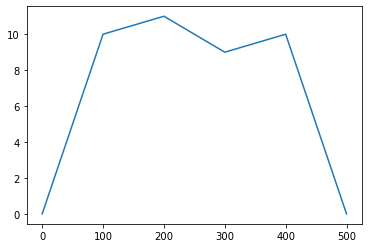

In [4]:
fig, ax = plt.subplots()
ax.plot(my_ctime, my_signal)

In [20]:
rng = np.random.rand(1)
print(rng)

[0.42221394]


# Add some noise

In [21]:
my_signal + np.random.rand(len(my_signal))

array([ 0.41561054, 10.53129759, 11.67049142,  9.30447201, 10.93515365,
        0.06884383])

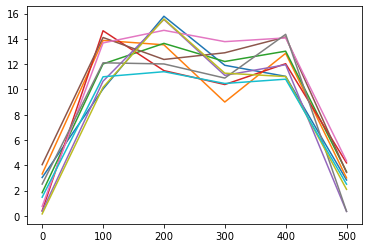

In [27]:
fig, ax = plt.subplots()

for i in range(10):
    my_signal = [0,10,11,9,10,0]
    my_ctime = [0, 100, 200, 300, 400, 500]
    my_signal = my_signal + np.random.rand(len(my_signal))*5

    ax.plot(my_ctime, my_signal)

In [28]:
my_control = [0,1,1.1, 0.9, 1.0,0]
my_ctime = [0, 100, 200, 300, 400, 500]

(0.0, 15.0)

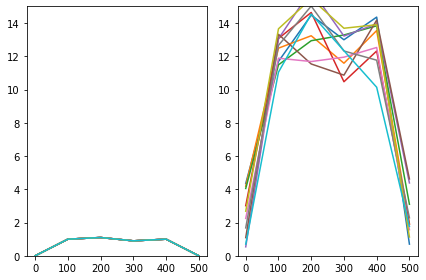

In [34]:
fig, ax = plt.subplots(1,2, tight_layout=True)

for i in range(10):

    my_control = np.array([0,1,1.1, 0.9, 1.0,0])
    my_signal = my_control*10
    my_signal = my_signal + np.random.rand(len(my_signal))*5
    my_ctime = [0, 100, 200, 300, 400, 500]

    ax[0].plot(my_ctime, my_control)
    ax[1].plot(my_ctime, my_signal)

ax[0].set_ylim(0,15)
ax[1].set_ylim(0,15)

In [131]:
# Define the objective function
def rosenbrock(control):
    my_signal = control*10
    my_signal = my_signal + np.random.rand(len(my_signal))*1
    
    objective = abs(my_signal - np.array([[0, 15, 15, 15, 15,0]]))
    
    return objective.sum()

# Define the starting point
my_control = np.array([0,1, 1, 1, 1, 0])

# Define bound constraints (lower <= x <= upper)
lower = np.array([0., 0., 0., 0., 0., 0.])
upper = np.array([2. , 2., 2., 2., 2., 2.])

# Call Py-BOBYQA

def run_optimiser():
    soln = pybobyqa.solve(rosenbrock, my_control, bounds=(lower, upper), objfun_has_noise=True, maxfun=4000)
    return soln

thread = Thread(target=run_optimiser())

# Display output
print(soln)

/eos/user/e/eljohnso/.local/lib/python3.9/site-packages/pybobyqa/solver.py:795: RuntimeWarning: x0 below lower bound, adjusting
  warnings.warn("x0 below lower bound, adjusting", RuntimeWarning)


****** Py-BOBYQA Results ******
Solution xmin = [0.         1.45447656 1.44872612 1.45639575 1.43482925 0.        ]
Objective value f(xmin) = 0.8488497463
Needed 4000 objective evaluations (at 4000 points)
Did a total of 107 runs
Approximate gradient = [   5.92184938  -76.47444271   91.37924509  107.4155038   -18.73891224
 -305.93803904]
Approximate Hessian = [[ 5.86161361e+02 -1.10675621e+02  2.24535580e+03  2.66188777e+03
   5.21432368e+03 -2.04670321e+02]
 [-1.10675621e+02 -2.93679187e+03  3.88584045e+03  1.44822623e+03
  -1.40728702e+01 -1.12209730e+04]
 [ 2.24535580e+03  3.88584045e+03  6.13889009e+03  3.72606407e+03
   6.74930978e+03 -4.51992962e+03]
 [ 2.66188777e+03  1.44822623e+03  3.72606407e+03  8.49451858e+03
   4.89015414e+03 -3.22080304e+03]
 [ 5.21432368e+03 -1.40728702e+01  6.74930978e+03  4.89015414e+03
   9.44130970e+03 -1.02950789e+01]
 [-2.04670321e+02 -1.12209730e+04 -4.51992962e+03 -3.22080304e+03
  -1.02950789e+01 -2.28949631e+03]]
Exit flag = 1
Warning (max eval

In [72]:
soln.x

array([0.        , 1.45447656, 1.44872612, 1.45639575, 1.43482925,
       0.        ])

(0.0, 20.0)

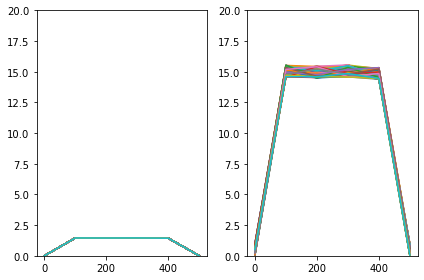

In [73]:
fig, ax = plt.subplots(1,2, tight_layout=True)

for i in range(100):

    my_control = soln.x
    my_signal = my_control*10
    my_signal = my_signal + np.random.rand(len(my_signal))*1
    my_ctime = [0, 100, 200, 300, 400, 500]

    ax[0].plot(my_ctime, my_control)
    ax[1].plot(my_ctime, my_signal)

ax[0].set_ylim(0,20)
ax[1].set_ylim(0,20)

In [75]:
import threading

In [76]:
event = threading.Event()

In [77]:
event.is_set()

False

In [82]:
event.clear()

In [ ]:
event.set()

In [83]:
event.is_set()

False

In [ ]:
event.wait()

In [86]:
ctime = np.array([0, 1000, 1200, 1350, 1434, 1690, 1740, 2400])
ctime

array([   0, 1000, 1200, 1350, 1434, 1690, 1740, 2400])

In [110]:
my_control = np.array([0.012846, 0.017848, 0.019486, 0.02235])
double_zero = np.array([0, 0,])
my_control = np.concatenate([double_zero,my_control,double_zero],)
my_control

array([0.      , 0.      , 0.012846, 0.017848, 0.019486, 0.02235 ,
       0.      , 0.      ])

In [113]:
setting = np.stack([ctime, my_control], axis=0)
setting

array([[0.0000e+00, 1.0000e+03, 1.2000e+03, 1.3500e+03, 1.4340e+03,
        1.6900e+03, 1.7400e+03, 2.4000e+03],
       [0.0000e+00, 0.0000e+00, 1.2846e-02, 1.7848e-02, 1.9486e-02,
        2.2350e-02, 0.0000e+00, 0.0000e+00]])

In [123]:
np.concatenate([np.zeros(13),np.ones(22)*800,np.zeros(8)])

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 800., 800., 800., 800., 800., 800., 800., 800., 800.,
       800., 800., 800., 800., 800., 800., 800., 800., 800., 800., 800.,
       800., 800.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

In [124]:
objective = np.concatenate([np.zeros(13),np.ones(22)*800,np.zeros(7)])
len(objective)

42